# **Core Problem Statement**

“Identify the key psychological, physiological, academic, social, and environmental factors that contribute to different types of stress (Eustress, Distress, No Stress) among college students aged 18–21, and build models to predict and manage stress effectively.”

## **About the Dataset:**
This dataset captures survey responses from 843 college students aged 18–21 regarding their experiences with stress, health, relationships, academics, and emotional well-being. The responses were collected via Google Forms using a five-point Likert scale ("Not at all" to "Extremely") and anonymized to protect privacy.

It enables nuanced analysis of emotional and physical stress indicators and their correlations with academic performance and lifestyle factors.

In [7]:
import os
import json

home_dir = os.path.expanduser("~")
kaggle_dir = os.path.join(home_dir, ".kaggle")
kaggle_json_path = os.path.join(kaggle_dir, "kaggle.json")

os.makedirs(kaggle_dir, exist_ok=True)

kaggle_credentials = {"username":"tahirazam","key":"5b76ff044a56df536545b584f5abb14b"}

with open(kaggle_json_path, "w") as f:
    json.dump(kaggle_credentials, f)

os.chmod(kaggle_json_path, 0o600)

print("Kaggle API key updated successfully.")

Kaggle API key updated successfully.


In [8]:
import kaggle
kaggle.api.dataset_download_files('mdsultanulislamovi/student-stress-monitoring-datasets', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/mdsultanulislamovi/student-stress-monitoring-datasets


In [13]:
import pandas as pd

df = pd.read_csv('StressLevelDataset.csv')
display(df.head())


,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


In [14]:
df.describe()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,...,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,11.063636,17.777273,0.492727,12.555455,2.508182,2.181818,2.660000,2.753636,2.649091,2.518182,...,2.772727,2.772727,2.621818,2.648182,2.649091,1.881818,2.734545,2.767273,2.617273,0.996364
std,6.117558,8.944599,0.500175,7.727008,1.409356,0.833575,1.548383,1.400713,1.328127,1.119208,...,1.433761,1.414594,1.315781,1.384579,1.529375,1.047826,1.425265,1.417562,1.530958,0.821673
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,11.000000,0.000000,6.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000
50%,11.000000,19.000000,0.000000,12.000000,3.000000,2.000000,2.500000,3.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.500000,3.000000,1.000000
75%,16.000000,26.000000,1.000000,19.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,...,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,2.000000
max,21.000000,30.000000,1.000000,27.000000,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,5.000000,2.000000


In [15]:
df.isnull().sum()

,0
anxiety_level,0
self_esteem,0
mental_health_history,0
depression,0
headache,0
blood_pressure,0
sleep_quality,0
breathing_problem,0
noise_level,0
living_conditions,0


In [16]:
df.dtypes

,0
anxiety_level,int64
self_esteem,int64
mental_health_history,int64
depression,int64
headache,int64
blood_pressure,int64
sleep_quality,int64
breathing_problem,int64
noise_level,int64
living_conditions,int64


#           Exploratory Data Analysis (EDA)

# Research Questions

In [19]:
stress_counts = df['stress_level'].value_counts(normalize=True) * 100
print(stress_counts)

stress_level
0    33.909091
2    33.545455
1    32.545455
Name: proportion, dtype: float64


**Research Question**:
What % of students fall into Eustress, Distress, or No Stress categories?

In [20]:
stress_counts = df['stress_level'].value_counts(normalize=True) * 100
print(stress_counts)

stress_level
0    33.909091
2    33.545455
1    32.545455
Name: proportion, dtype: float64


In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# What are the most common psychological symptoms (anxiety, sadness, loneliness)?

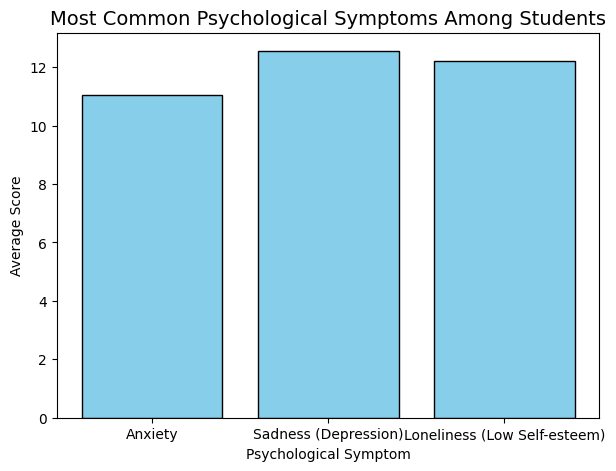

In [24]:
# Extract relevant psychological symptoms
symptoms = {
    "Anxiety": df["anxiety_level"].mean(),
    "Sadness (Depression)": df["depression"].mean(),
    "Loneliness (Low Self-esteem)": (df["self_esteem"].max() - df["self_esteem"]).mean()  # inverse
}

# Convert to DataFrame for plotting
symptoms_df = pd.DataFrame(list(symptoms.items()), columns=["Symptom", "Average Score"])

# Plot
plt.figure(figsize=(7,5))
plt.bar(symptoms_df["Symptom"], symptoms_df["Average Score"], color="skyblue", edgecolor="black")
plt.title("Most Common Psychological Symptoms Among Students", fontsize=14)
plt.ylabel("Average Score")
plt.xlabel("Psychological Symptom")
plt.show()

Which physical health issues (headache, sleep problems) are most reported?

# Which physical health issues (headache, sleep problems) are most reported?

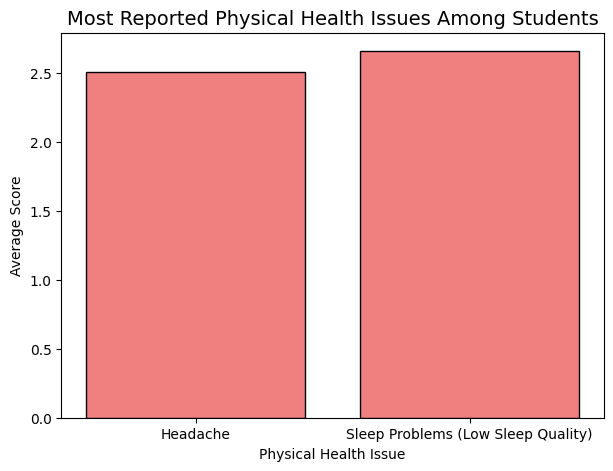

In [25]:
# Extract relevant physical health issues
physical_symptoms = {
    "Headache": df["headache"].mean(),
    "Sleep Problems (Low Sleep Quality)": df["sleep_quality"].mean()
}

# Convert to DataFrame for plotting
physical_symptoms_df = pd.DataFrame(list(physical_symptoms.items()), columns=["Symptom", "Average Score"])

# Plot
plt.figure(figsize=(7,5))
plt.bar(physical_symptoms_df["Symptom"], physical_symptoms_df["Average Score"], color="lightcoral", edgecolor="black")
plt.title("Most Reported Physical Health Issues Among Students", fontsize=14)
plt.ylabel("Average Score")
plt.xlabel("Physical Health Issue")
plt.show()

# How do academic stressors (study load, competition, subject confidence) vary across students?

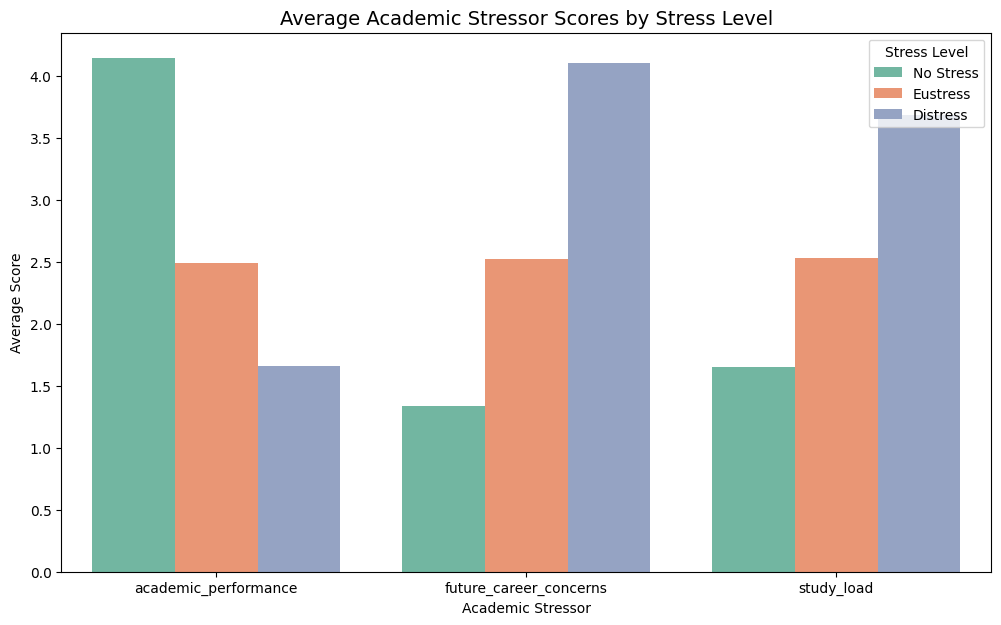

In [36]:
# Calculate average academic stressor scores by stress level
academic_stress_avg = melted.groupby(["Academic Stressor", "stress_level"])["Score"].mean().reset_index()

# Map stress level numbers to labels for better readability
stress_level_map = {0: "No Stress", 1: "Eustress", 2: "Distress"}
academic_stress_avg['Stress Level Label'] = academic_stress_avg['stress_level'].map(stress_level_map)

# Create grouped bar charts
plt.figure(figsize=(12, 7))
sns.barplot(x="Academic Stressor", y="Score", hue="Stress Level Label", data=academic_stress_avg, palette="Set2")
plt.title("Average Academic Stressor Scores by Stress Level", fontsize=14)
plt.ylabel("Average Score")
plt.xlabel("Academic Stressor")
plt.legend(title="Stress Level")
plt.show()

# Do stress levels vary by age or gender?

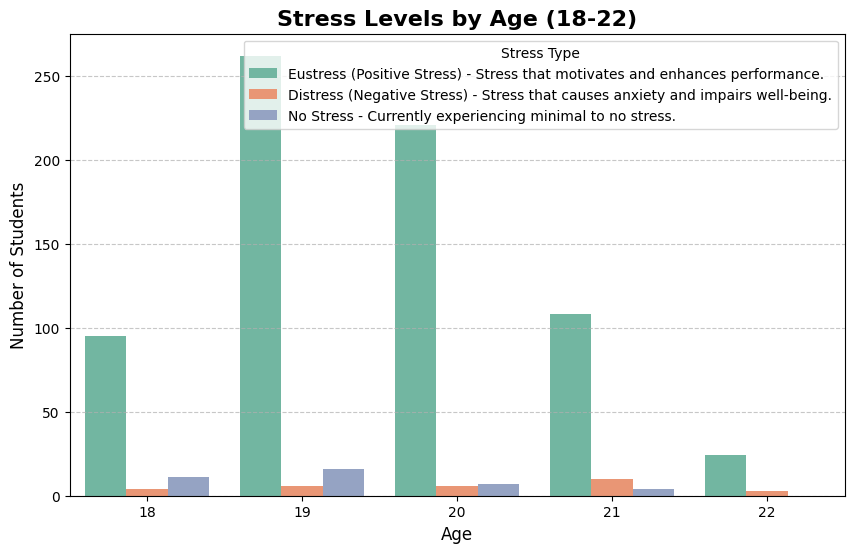

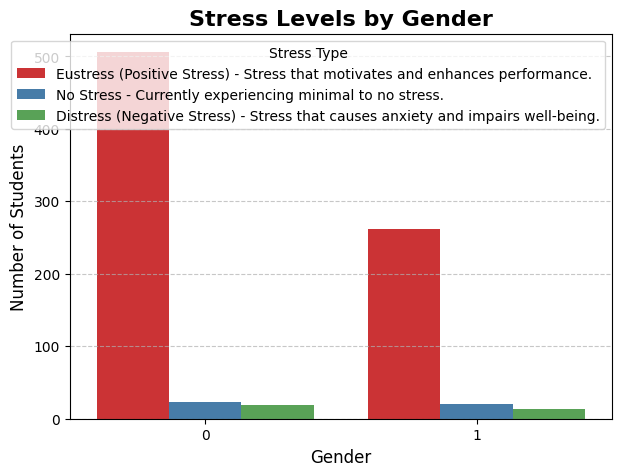

In [41]:
# Filter data for age between 18 and 22
stress_df_filtered_age = stress_df[(stress_df['Age'] >= 18) & (stress_df['Age'] <= 22)].copy()

# --- Stress by Age (Filtered) ---
plt.figure(figsize=(10,6))
sns.countplot(data=stress_df_filtered_age, x="Age", hue="Which type of stress do you primarily experience?", palette="Set2")
plt.title("Stress Levels by Age (18-22)", fontsize=16, weight="bold")
plt.xlabel("Age", fontsize=12)
plt.ylabel("Number of Students", fontsize=12)
plt.legend(title="Stress Type")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# --- Stress by Gender ---
plt.figure(figsize=(7,5))
sns.countplot(data=stress_df, x="Gender", hue="Which type of stress do you primarily experience?", palette="Set1")
plt.title("Stress Levels by Gender", fontsize=16, weight="bold")
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Number of Students", fontsize=12)
plt.legend(title="Stress Type")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks([0, 1], ['0', '1']) # Label gender ticks
plt.show()

# **Diagnostic Questions**

# Which factors most strongly correlate with distress?

/tmp/ipython-input-4275560548.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr.values, y=top_corr.index, palette="Reds_r")


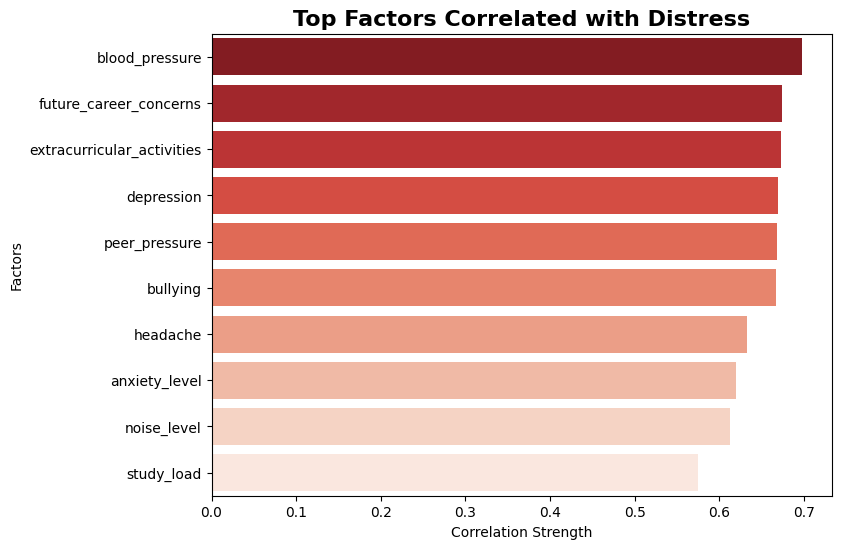

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Binary target for distress (stress_level == 2)
df["is_distress"] = (df["stress_level"] == 2).astype(int)

# Correlation with distress
corr = df.corr(numeric_only=True)["is_distress"].sort_values(ascending=False)

# Top 10 factors (excluding the distress and stress_level columns themselves)
top_corr = corr.drop(["is_distress", "stress_level"]).head(10)

# Plot
plt.figure(figsize=(8,6))
sns.barplot(x=top_corr.values, y=top_corr.index, palette="Reds_r")
plt.title("Top Factors Correlated with Distress", fontsize=16, weight="bold")
plt.xlabel("Correlation Strength")
plt.ylabel("Factors")
plt.show()

# Do sleep problems have a stronger link with distress than anxiety?

In [45]:

# Binary target: Distress vs Others
df["is_distress"] = (df["stress_level"] == 2).astype(int)

# Correlation check
corr_sleep = df["sleep_quality"].corr(df["is_distress"])
corr_anxiety = df["anxiety_level"].corr(df["is_distress"])

print("Correlation with Distress:")
print(f"Sleep Problems (low quality): {corr_sleep:.3f}")
print(f"Anxiety Level: {corr_anxiety:.3f}")

# Stronger link?
if abs(corr_anxiety) > abs(corr_sleep):
    print("➡️ Anxiety has a stronger link with Distress.")
else:
    print("➡️ Sleep Problems have a stronger link with Distress.")


Correlation with Distress:
Sleep Problems (low quality): -0.623
Anxiety Level: 0.620
➡️ Sleep Problems have a stronger link with Distress.


# How do social factors (relationships, isolation, peer pressure) influence stress levels?

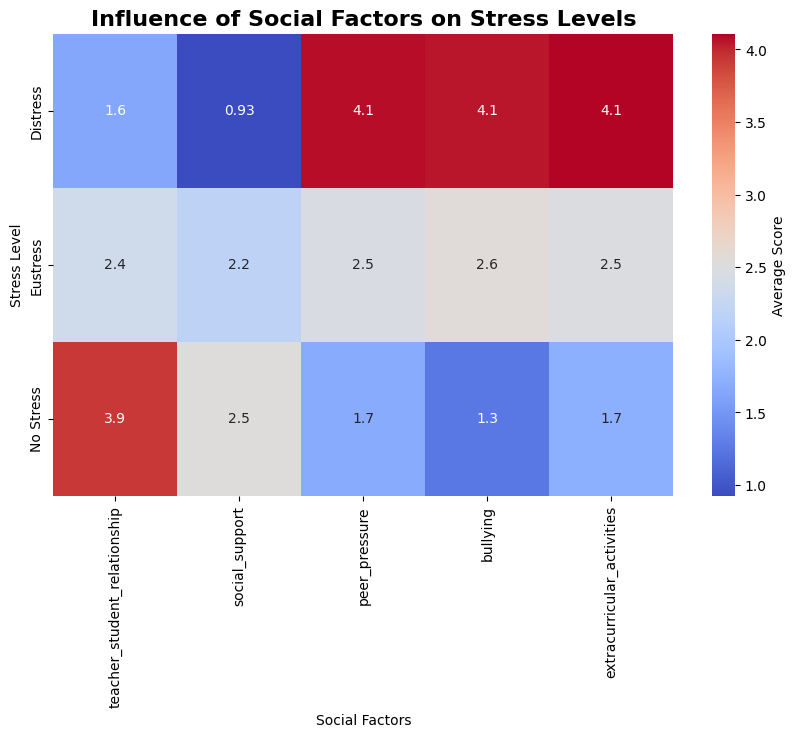

In [49]:
# Map stress levels
stress_map = {0: "No Stress", 1: "Eustress", 2: "Distress"}
df["stress_label"] = df["stress_level"].map(stress_map)

# Select social factors
social_cols = ["teacher_student_relationship", "social_support", "peer_pressure", "bullying", "extracurricular_activities"]

# Calculate mean scores by stress group
social_means = df.groupby("stress_label")[social_cols].mean()

# Plot
plt.figure(figsize=(10,6))
sns.heatmap(social_means, annot=True, cmap="coolwarm", cbar_kws={'label': 'Average Score'})
plt.title("Influence of Social Factors on Stress Levels", fontsize=16, weight="bold")
plt.ylabel("Stress Level")
plt.xlabel("Social Factors")
plt.show()

# **Prescriptive Questions**

# What academic policy changes (reduce workload, improve teacher-student relationships) can reduce stress?

/tmp/ipython-input-1468312460.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=importance.values, y=importance.index, palette="viridis")


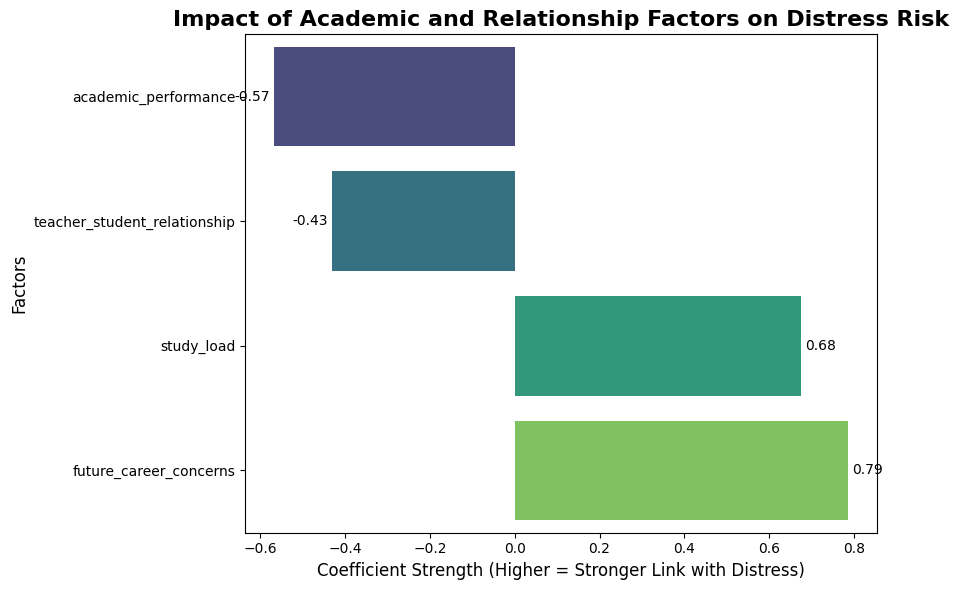

              precision    recall  f1-score   support

           0       0.92      0.95      0.94       149
           1       0.89      0.83      0.86        71

    accuracy                           0.91       220
   macro avg       0.91      0.89      0.90       220
weighted avg       0.91      0.91      0.91       220



In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Select relevant features + stress
# Corrected column names based on the DataFrame
academic_features = ["study_load", "academic_performance", "future_career_concerns", "teacher_student_relationship"]
X = df[academic_features]
y = df["stress_level"].apply(lambda x: 1 if x == 2 else 0)  # 1 = Distress, 0 = No Distress/Eustress

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Feature importance (coefficients)
importance = pd.Series(model.coef_[0], index=academic_features).sort_values()

# Plot
plt.figure(figsize=(9, 6)) # Increased figure size
ax = sns.barplot(x=importance.values, y=importance.index, palette="viridis")
plt.title("Impact of Academic and Relationship Factors on Distress Risk", fontsize=16, weight="bold") # Increased title font size and made bold
plt.xlabel("Coefficient Strength (Higher = Stronger Link with Distress)", fontsize=12) # Increased xlabel font size
plt.ylabel("Factors", fontsize=12) # Increased ylabel font size

# Add annotations to the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3)

plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

# Predictions report
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))